# Stroke Detection 

The Center for Disease and Control reports that every 40 seconds a person suffers from a stroke in the United States. Given a set a health parameters, we wish to train to different machine learning models to predict if a patient is likely to suffer a stroke.  


The data in use will be composed of the following parameters: 

**d:** unique identifier

**gender:** "Male", "Female" or "Other"

**age:** age of the patient

**hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

**heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**ever_married:** "No" or "Yes"

**work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**Residence_type:** "Rural" or "Urban"

**avg_glucose_level:** average glucose level in blood

**bmi:** body mass index

**smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

**stroke:** 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient


**Data Source:** __[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)__

**CDC Fact:** __[Stroke Facts | Stroke | CDC](https://www.cdc.gov/stroke/data-research/facts-stats/index.html)__

## Import Libraries and Data

In [243]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [244]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [246]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There's 201 empty value for **bmi**. Body mass index (BMI) is calculated by a person's weight in kilograms divided by the square height in meters. Since our data does not inlcude the patient's weight or height we cannot accurately calculate the person's BMI. We can fill in this value by using the average BMI based on the age of the patient. However, for the purpose of this exercise, we will drop the patients with an empty BMI value since we still retain a high number of patients. 

In [247]:
df = df.dropna()
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [248]:
df.duplicated().sum()

0

In [249]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


Text(0.5, 1.0, 'Count of Gender')

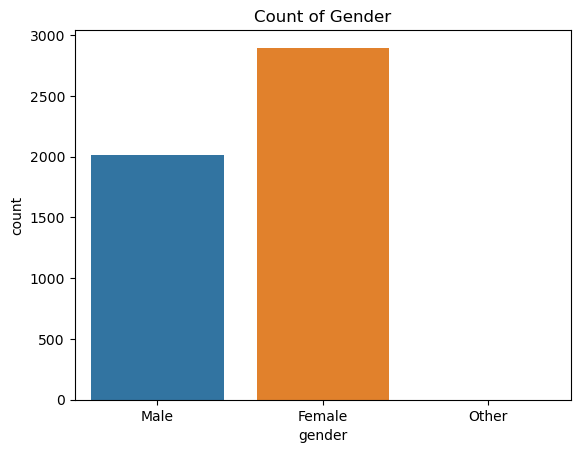

In [250]:
sns.countplot(df,x = 'gender',hue = 'gender')
plt.title('Count of Gender')

In [251]:
df[df['gender'] == 'Other'].count()

id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64

In [252]:
df.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

/var/folders/l1/r5wnb9_97n54vngd7ssrz5l80000gn/T/ipykernel_29339/2104878418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x = 'smoking_status',y = 'bmi',palette='Set1')


<Axes: xlabel='smoking_status', ylabel='bmi'>

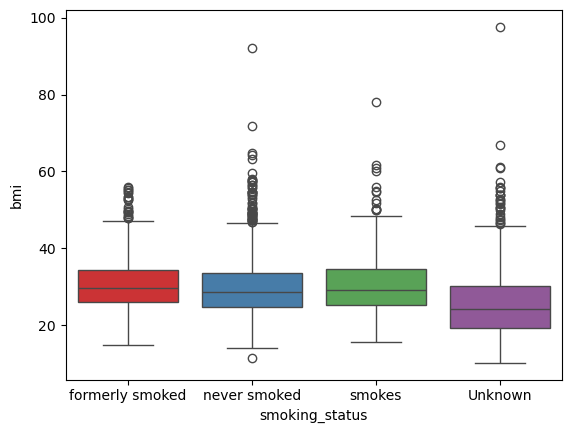

In [253]:
sns.boxplot(df, x = 'smoking_status',y = 'bmi',palette='Set1')

Text(0.5, 1.0, 'BMI Distribution')

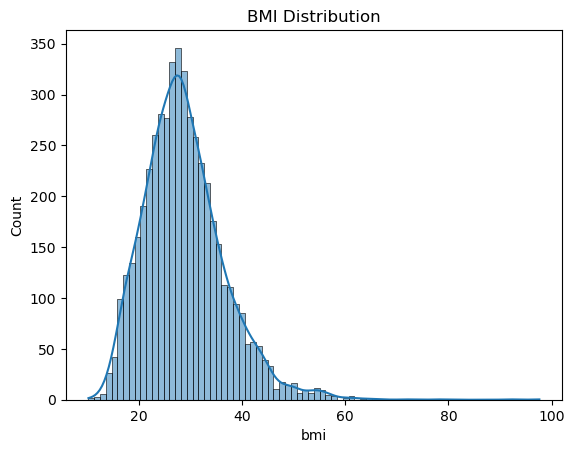

In [254]:
sns.histplot(df['bmi'],kde = True)
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Average Glucose Level Distribution')

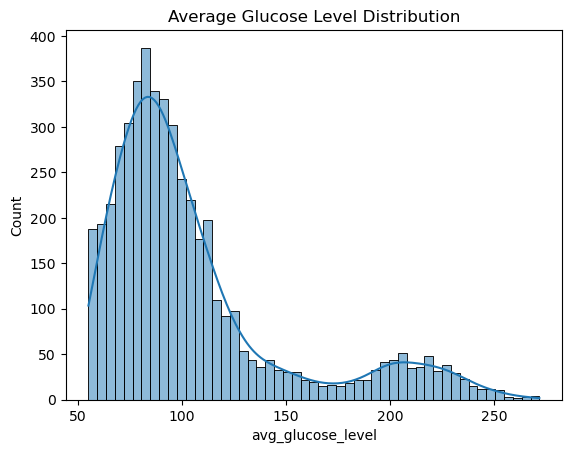

In [255]:
sns.histplot(df['avg_glucose_level'],kde = True)
plt.title('Average Glucose Level Distribution')

Text(0.5, 1.0, 'Age Distribution')

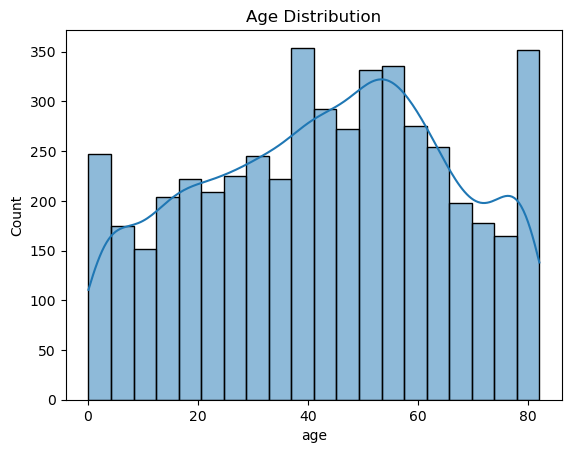

In [256]:
sns.histplot(df['age'],kde = True)
plt.title('Age Distribution')

In [257]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


 The **id** column is a unique identifier for a given patient. For the purpose of our models, we will not need this identifier and can thefore drop the column.
  



In [258]:
df = df.drop('id',axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [259]:
df.corr(numeric_only=True)['stroke'].sort_values()

bmi                  0.042374
heart_disease        0.137938
avg_glucose_level    0.138936
hypertension         0.142515
age                  0.232331
stroke               1.000000
Name: stroke, dtype: float64

<Axes: >

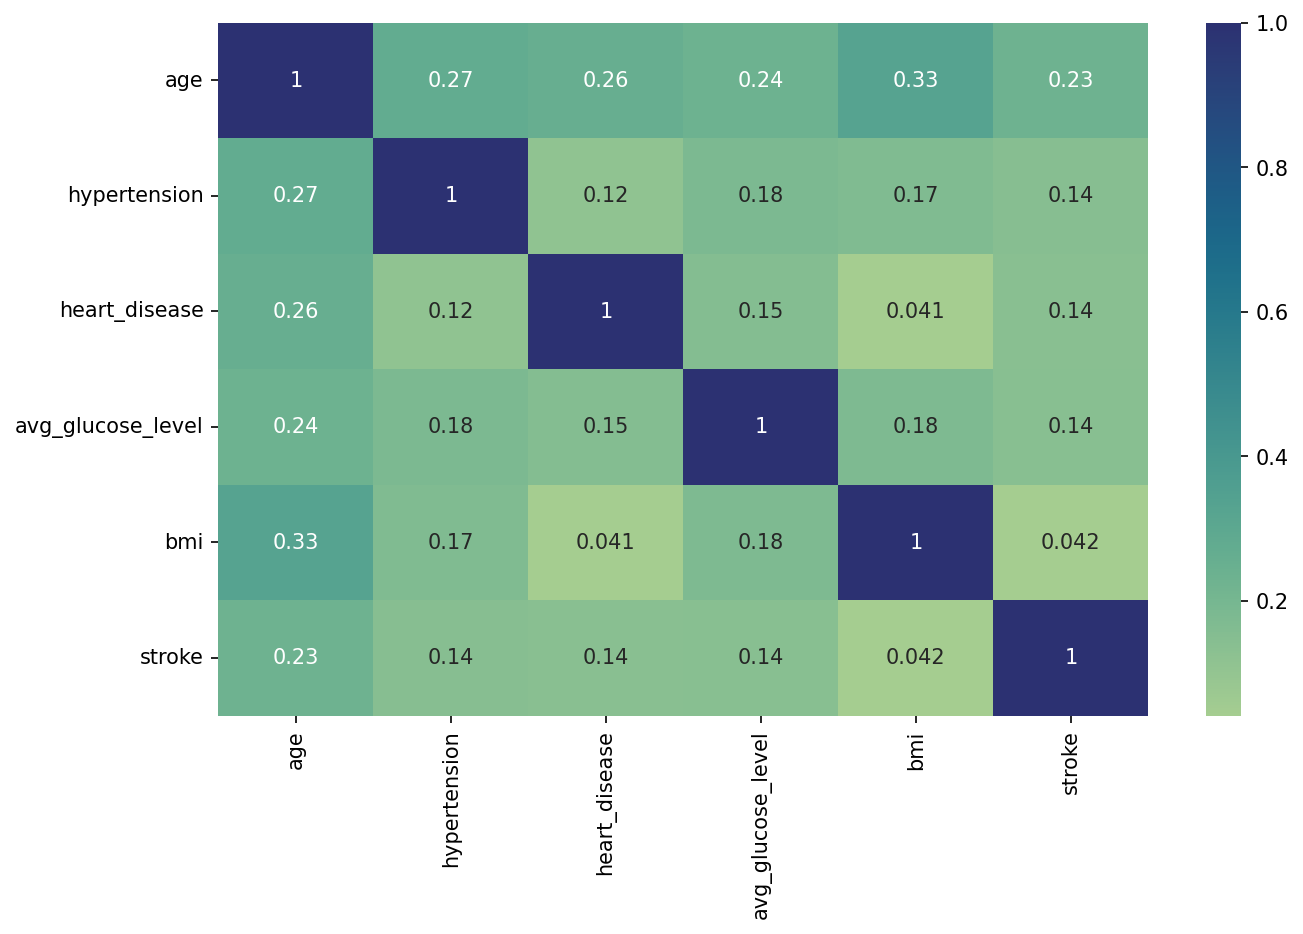

In [260]:
plt.figure(figsize=(10,6),dpi = 150)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap = 'crest',linecolor = 'white')

There are several columns with categorical values that we need to change before we can use it in our model. We can use the _get_dummies_ function from Pandas; however, this will result on adding more columns to our data frame. In order to keep the same number of columns, we will use the _Label Encoder_ from SciKit Learn. The categories we need to encode are: **gender, ever_married, work_type, Residence_type,** and **'smoking_status'**.

In [261]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['gender','ever_married','work_type','Residence_type','smoking_status']] = df[['gender','ever_married','work_type','Residence_type','smoking_status']].apply(LabelEncoder().fit_transform)

In [262]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


Let's scale our data 

In [263]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df.drop('stroke',axis = 1)
y = df['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaled_X_train = mmscaler.fit_transform(X_train)
scaled_X_test = mmscaler.transform(X_test)

### Model Fitting and Evaluation

We will compare two different models to predict the likelyhood of a patient suffering a stroke. The models will be: Random Forest Classifier and Gausssian NB

In [264]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(scaled_X_train,y_train)
rfc_pred = rfc.predict(scaled_X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [265]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(scaled_X_train,y_train)
gnb_pred = gnb.predict(scaled_X_test)
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       929
           1       0.20      0.42      0.27        53

    accuracy                           0.88       982
   macro avg       0.58      0.66      0.60       982
weighted avg       0.92      0.88      0.90       982



In [268]:
#RFC Confusion Matrix 
rfc_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred),
                                       display_labels=['No Stroke','Stroke'])


#Gaussian NB Confusion Matrix 
gnb_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,gnb_pred),
                                       display_labels=['No Stroke','Stroke'])

model = [rfc_confusion,gnb_confusion]
model_name = ['Random Forest Classifier','GaussianNB']

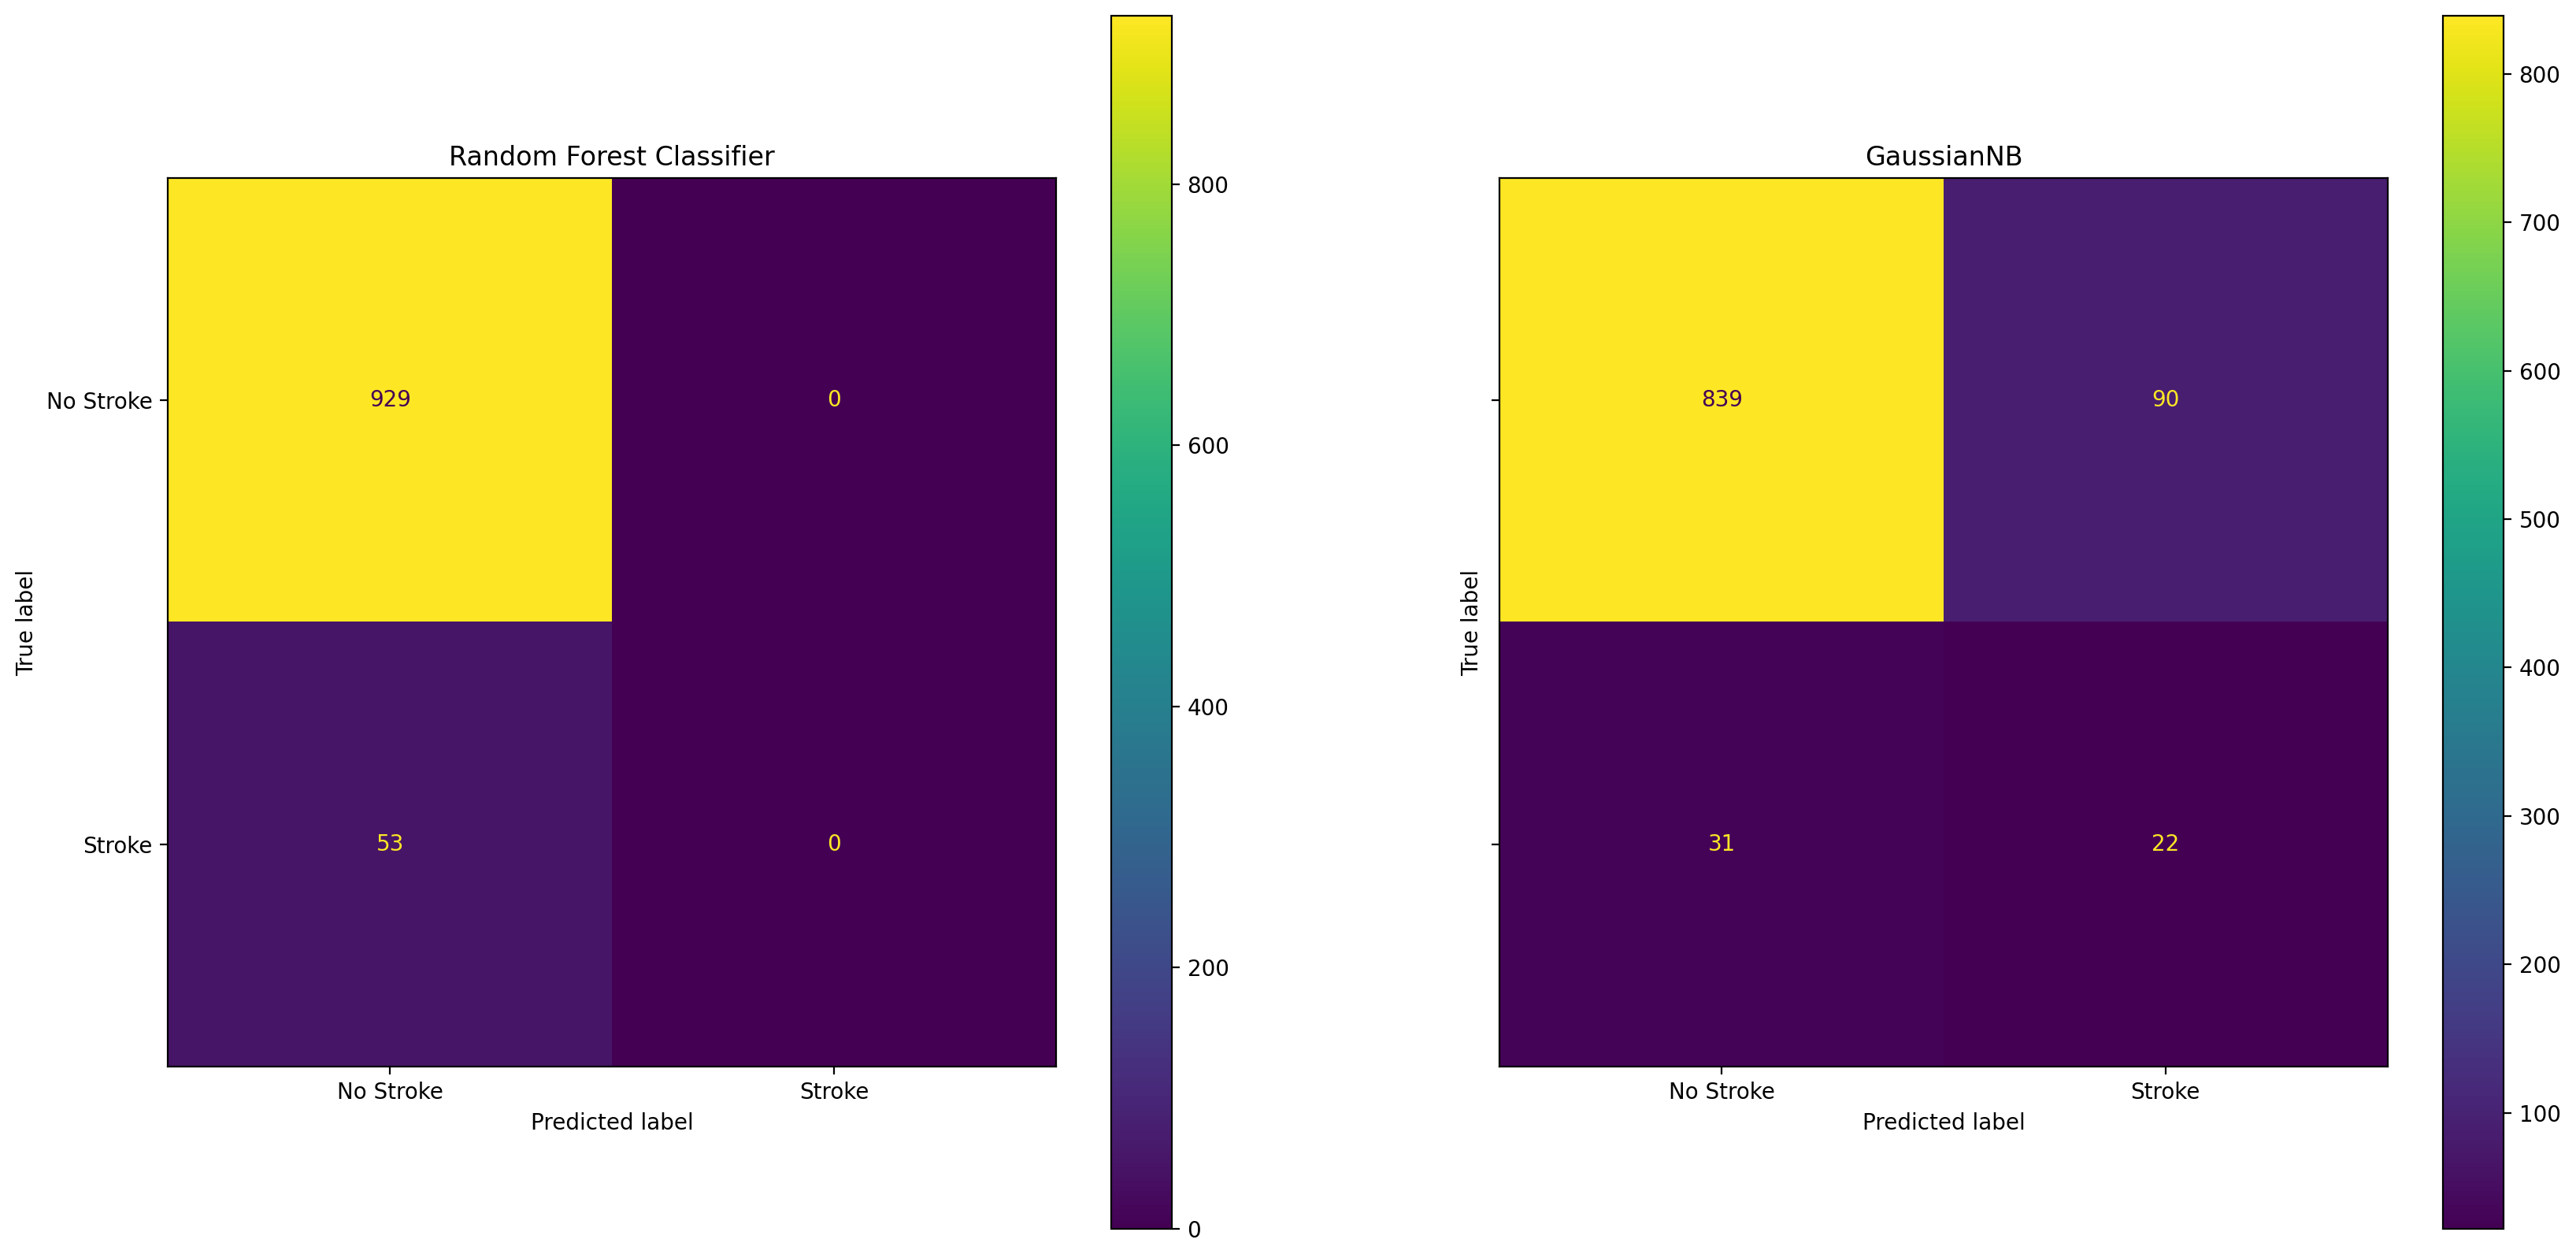

In [269]:
f,ax = f,ax = plt.subplots(1,2,sharey=True,figsize = (20,10),dpi = 200)
for i in range(0,2):
    model[i].plot(ax = ax[i])
    model[i].ax_.set_title(model_name[i])
    

### Conclusions

From the results above, we notice that the Random Forest Classifier has a higher accuracy than the GaussianNB. However, the confusion matrix plot helps us visualize that there are no patients that did not have a stroke predicted as such. On the other hand, the GaussianNB model, calculates a lower number of false negative. In this scenario, is better to detect a patient as likely having a stroke and not experiencing one rather than having a patient being misdiagnosed with not likely to have a stroke. For these reasons, although still needing to be tuned, the GaussianNB model is a better choice. 